# Aufgabe 3a

__Allgemeine Fragen zur Evaluation eines Klassifikators:__

__Welche Klassifikationsfehlerwahrscheinlichkeit erhält man, wenn man einen k-NN-Klassifikator für k = 1 auf der gespeicherten Lern-Daten-Menge X testet?__

Wird ein k-NN-Klassifikator für k=1 getestet, so erhält man eine Klassifikationesfehlerwahrscheinlichkeit von 0% [ siehe Aufgabe 2d) A-Posteriori Class Distribution]

__Bedeutet dies, dass der k-NN-Klassifikator auch auf neuen Datenvektoren x (welche nicht gespeichert sind) immer korrekt klassifiziert?__

Nein, dies bedeutet lediglich, dass der k-NN-Klassifikator zu wenige Datenpunkte betrachtet um eine mögliche Falschklassifizierung berechnen zu können, bzw dass die Lern- und Testdaten zu ähnlich oder gar gleich waren und der Klassifikator auf den vermeintlich neuken Datenvektor eingelernt wurde.

__Was kann man tun um einen realistischen Schätzwert des Generalisierungsfehlers
(d.h. der Klassifikationsfehlerwahrscheinlichkeit für neue Daten) zu erhalten ?__

Für k muss ein geeigneter Wert, welcher nicht zu groß aber auch nicht zu klein ist gewählt werden. Außerdem müssen Validierungs- und Trainingsdaten strikt getrennt werden. Je mehr Validierungsdaten man verwendet, desto realistischer wird der Schätzwert des Generalisierungsfehlers, desto weniger Trainingsdaten sind jedoch vorhanden.

__Erklären Sie kurz den Begriff Kreuzvalidierung und ihren Zweck! Lesen Sie hierzu
im Skript (siehe Folien zu Kapitel 2).__

Bei der Kreuzvalidierung verwendet immer einen Teil der Testdaten zum Validieren, jedoch nie die gesamten Test-Daten in einem Durchlauf. Hierfür werden die Test-Daten in S-Teile geteilt. Dann wird das Modell S mal mit den Test-Daten trainiert, wobei jedesmal ein (anderer) Teil der Daten zur Validierung zurückbehalten wird. Am Ende erhält man den den Generalisierungsfehler durch mitteln der Ergebnisse aller S Durchgänge.
Der Zweck dieser Methode ist, dass man alle Daten sowohl zum Testen, als auch zum Validieren verwenden kann. Je größer S gewählt wird, desto mehr der Daten können zum Trainieren verwendet werden, die Anzahl der Durchgänge erhöht sich jedoch ebenfalls.

# Aufgabe 3b

__Code Review: Betrachten Sie das Python-Modul V1A2_Classifier.py aus Aufgabe 2. Versuchen Sie die Implementierung der Methode Classifier.crossvalidate(self,S,X,T) zu verstehen:__

__Was bedeutet der Parameter S ?__

S steht hier für die Anzahl der Teile, in welche die Testdaten geteilt werden, und dementsprechend auch für die Anzahl der Durchläufe von Training und Validierung -> S-Fache Kreuzvalidierung

__Welche Rolle spielen die Variablen perm sowie Xp und Tp ?__

__perm__: Bei einer Permutation handelt es sich um eine Umstellung der Reihnenfolge, in perm wird nun also eine zufällig generierte Zahlenfolge für Indexe der Länge X=T erstellt. 

__Xp__ und __Tp__: in Xp und Tp werden nun X und T mittels der Indexreihenfolge von perm permutiert und gespeichert.

__Welche Rolle spielt idxS ?__
In idxS werden Start und Endpunkte der S Aufteilungen der Testdaten gespeichert. 

In [2]:
#Bsp idxS
N=16
S=4
idxS = [range(i*N//S,(i+1)*N//S) for i in range(S)]
print(idxS)

[range(0, 4), range(4, 8), range(8, 12), range(12, 16)]


__Was bewirkt die äußere Schleife for idxTest in idxS: ... ?__
in diesem Loop wird über alle zuvor generierten Datensets [range(x, y)] iteriert ->bsp: __if i not in idxTest__ 

__Welche Rolle haben die Variablen X_learn und T_learn bzw. X_test und T_test ?__
X_learn und T_learn stehen für die Lerndatensets mit welchen der Klassifier in diesem Durchgang trainiert wird , X_test und T_test stehen für die Test bzw validierungsdaten des Durchgangs.

__Was passiert für S=1 ?__
für S=1 wird das gesamte Datenset sowohl zum Lernen als auch zum Testen verwendet. Dies sollte vermieden werden!

__Was bewirkt die innere Schleife for i in range(len(X_test)): ... ?__
In dieser Schleife wird über alle in X_test gespeicherten Testvektoren des Testdatensets des Durchganges iteriert.

__Was bedeuten die Ergebnisse der Kreuzvalidierung pClassError und pConfErrors?__

__pClassError:__ gibt die Wahrscheinlichkeit einer Falschklassifizierung zurück, diese wird aus 1-Accuracy berechnet.

__pConfErrors:__ gibt eine Konfusionsmatrix pConfErrors[i,j] zurück. Diese gibt die Wahrscheinlichkeit an, dass ein Vektor der Klasse j als Klasse i Falschklassifiziert wird.


# Aufgabe 3c

__Wir betrachten nun ein 2-Klassen-Problem für Gauß-verteilte Datenvektoren__

__Versuchen Sie das Programmgerüst V1A3_CrossVal_KNN.py zu verstehen und zu vervollständigen:__


__Wozu benötigt man den Befehl from V1A2_Classifier import * ?__
dieser Befehl wird benötigt um auf das in Aufgabe 2 erstellte Modul mit den k-NN-Klassifikationen zugreifen zu können.

__Mit welchem Befehl werden die Gauß-verteilten Datenvektoren erzeugt? Wieviele Datenpunkte werden generiert? Was bedeuten die Variablen N, N1, N2?__

X1 = np.random.multivariate_normal(mu1,sigma1,(N1)) zur Erzeugung der Gauß-Verteilten Datenvektoren.

Es werden N1+N2 = 1000 Datenpunkte generiert.
N, N1 und N2 stehen für die Anzahl der Datenpunkte.

__Welche Klassenspezifischen Verteilungen haben die Daten? Geben Sie für jede Klasse Mittelwert und Kovarianzmatrix an__

mu1, mu2 = [1,1], [3,1]           # expectations for the two classes

sigma1 = [[1,0.5],\
          [0.5,1]]                # covariance matrix for class 1

sigma2 = [[1,0.5],\
          [0.5,1]]                # covariance matrix for class 2
          
__Welche Bedeutung haben die Variablen pE_naive, pCE_naive und t_naive ?__

pE_naive und pCE_naive enthalten die  Rückgabewerte der Kreuzvalidation mittels eines naiven k-NN, also die pClassError und pConfError sowie mit t_naive die benötigte Zeit.


In [3]:
#!/usr/bin/env python
# Programmgeruest zu Versuch 1, Aufgabe 3
import numpy as np
import scipy.spatial
from random import randint
import matplotlib 
import matplotlib.pyplot as plt 
from time import clock
from V1A2_Classifier import *

# (i) create some synthetic data (2-dimensional Gaussian)
C=2                               # two classes
N1,N2=500,500                     # N1 and N2 data vectors for the two classes
mu1, mu2 = [1,1], [3,1]           # expectations for the two classes
sigma1 = [[1,0.5],\
          [0.5,1]]                # covariance matrix for class 1
sigma2 = [[1,0.5],\
          [0.5,1]]                # covariance matrix for class 2
X1 = np.random.multivariate_normal(mu1,sigma1,(N1))    # Gaussian data vectors for class 1
X2 = np.random.multivariate_normal(mu2,sigma2,(N2))    # Gaussian data vectors for class 2
T1,T2 = N1*[0],N2*[1]             # corresponding class labels 
X = np.concatenate((X1,X2))       # entire data set
T = np.concatenate((T1,T2))       # entire label set
N,D = X.shape[0], X.shape[1]      # size of data set
print ("Data size: N=",N,", D=",D)

# (ii) create and test classifiers
k,S = 5,10                        # k=number of nearest neighbors; S=number of data subsets for cross validation
X_test = np.array([[2,1],[5,1],[-1,1]])   # Some additional data vectors to be tested 

# (ii.a) test of naive KNN classifier
print ("\nNaive KNN Classifier:","\n------------------------")
knnc = KNNClassifier(C,k)         # create classifier object of class KNNClassifier
t1=clock()                        # start time     
pE_naive,pCE_naive = knnc.crossvalidate(S,X,T) # do S-fold cross validation for data X,T
t2=clock()                        # end time
t_naive=t2-t1                     # wall time required by the naive KNN algorithmus (in seconds)
print ("S=", S, " fold Cross-Validation of naive ", k, "-NN-Classifier requires ", t_naive, " seconds. Confusion error probability matrix is \n", pCE_naive)
print ("Probability of a classification error is pE = ", pE_naive)
knnc.fit(X,T)                     # train classifier with whole data set
for x_test in X_test:             # Test some additional data vectors x_test from X_test         
    t_test,p_class,idxNN = knnc.predict(x_test,k)
    print ("New data vector x_test=", x_test, " is most likely from class ", t_test, "; class probabilities are p_class = ", p_class)

# (ii.b) test of KD-tree KNN classifier
print ("\nFast KNN Classifier based on KD-Trees:","\n---------------------------------------")
fknnc = FastKNNClassifier(C,k)
ft1=clock()
pE_kdtree,pCE_kdtree=fknnc.crossvalidate(S,X,T)  
ft2=clock()                        # end time
t_kdtree=ft2-ft1 

print ("S=", S, " fold Cross-Validation of kdTree ", k, "-NN-Classifier requires ", t_kdtree, " seconds. Confusion error probability matrix is \n", pCE_kdtree)
print ("Probability of a classification error is pE = ", pE_kdtree)
fknnc.fit(X,T)                     # train classifier with whole data set
for x_test in X_test:             # Test some additional data vectors x_test from X_test         
    t_test,p_class,idxNN = fknnc.predict(x_test,k)
    print ("New data vector x_test=", x_test, " is most likely from class ", t_test, "; class probabilities are p_class = ", p_class)# REPLACE BY YOUR OWN CODE

# (iii) plot data
f=plt.figure()
a = f.add_subplot(111)
a.plot(X1.T[0],X1.T[1],'rx')               # plot data vectors of class 1
a.plot(X2.T[0],X2.T[1],'g+')               # plot data vectors of class 2
a.set_xlabel('feature x1');
a.set_ylabel('feature x2');
a.set_title('Naive: '+str(t_naive)+'sec/ KD-Tree: '+str(t_kdtree)+'sec; Classification Error='+str(pE_naive)+'/'+str(pE_kdtree));

plt.show()

Data size: N= 1000 , D= 2

Naive KNN Classifier: 
------------------------


C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


S= 10  fold Cross-Validation of naive  5 -NN-Classifier requires  23.135540477000177  seconds. Confusion error probability matrix is 
 [[0.862 0.172]
 [0.138 0.828]]
Probability of a classification error is pE =  0.155
New data vector x_test= [2 1]  is most likely from class  1 ; class probabilities are p_class =  [0.6, 0.4]
New data vector x_test= [5 1]  is most likely from class  1 ; class probabilities are p_class =  [1.0]
New data vector x_test= [-1  1]  is most likely from class  0 ; class probabilities are p_class =  [1.0]

Fast KNN Classifier based on KD-Trees: 
---------------------------------------
S= 10  fold Cross-Validation of kdTree  5 -NN-Classifier requires  0.2739618949999567  seconds. Confusion error probability matrix is 
 [[0.862 0.168]
 [0.138 0.832]]
Probability of a classification error is pE =  0.153
New data vector x_test= [2 1]  is most likely from class  1 ; class probabilities are p_class =  [0.6, 0.4]
New data vector x_test= [5 1]  is most likely from class

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


<Figure size 640x480 with 1 Axes>

# Aufgabe 3d

__Bestimmen Sie Klassifikationsfehler und Verwechslungswahrscheinlichkeiten für die gegebenen Daten bei Kreuzvalidierung mit dem k-NN-Klassifikator für k = 1, k= 5, k= 11 kombiniert mit S = 1, S = 2, S= 5?__

In [9]:
#!/usr/bin/env python
# Programmgeruest zu Versuch 1, Aufgabe 3
import numpy as np
import scipy.spatial
from random import randint
import matplotlib 
import matplotlib.pyplot as plt 
from time import clock
from astropy.table import Table
from V1A2_Classifier import *

# (i) create some synthetic data (2-dimensional Gaussian)
C=2                               # two classes
N1,N2=500,500                     # N1 and N2 data vectors for the two classes
mu1, mu2 = [1,1], [3,1]           # expectations for the two classes
sigma1 = [[1,0.5],\
          [0.5,1]]                # covariance matrix for class 1
sigma2 = [[1,0.5],\
          [0.5,1]]                # covariance matrix for class 2
X1 = np.random.multivariate_normal(mu1,sigma1,(N1))    # Gaussian data vectors for class 1
X2 = np.random.multivariate_normal(mu2,sigma2,(N2))    # Gaussian data vectors for class 2
T1,T2 = N1*[0],N2*[1]             # corresponding class labels 
X = np.concatenate((X1,X2))       # entire data set
T = np.concatenate((T1,T2))       # entire label set
N,D = X.shape[0], X.shape[1]      # size of data set

#for saving Data for Tableview
k_table, naive_k_table =[],[]
S_table, naive_S_table =[],[]
t_table, naive_t_table =[],[]
pCE_table, naive_pCE_table =[], []
pE_table, naive_pE_table =[],[]

print ("Data size: N=",N,", D=",D)

# (ii) create and test classifiers
k_array = [1,5,11]   # k=number of nearest neighbors;
S_array = [1,2,5]     #S=number of data subsets for cross validation
X_test = np.array([[2,1],[5,1],[-1,1]])   # Some additional data vectors to be tested 

for k in k_array:
    for S in S_array:
        
        # (ii.a) test of naive KNN classifier
        print ("\nNaive KNN Classifier:","\n------------------------")
        knnc = KNNClassifier(C,k)         # create classifier object of class KNNClassifier
        t1=clock()                        # start time     
        pE_naive,pCE_naive = knnc.crossvalidate(S,X,T) # do S-fold cross validation for data X,T
        t2=clock()                        # end time
        t_naive=t2-t1                     # wall time required by the naive KNN algorithmus (in seconds)
        
        #save Data for Table view
        naive_k_table.append(k)
        naive_S_table.append(S)
        naive_t_table.append(t_naive)
        naive_pCE_table.append(pCE_naive)
        naive_pE_table.append(pE_naive)
        
        print ("S=", S, " fold Cross-Validation of naive ", k, "-NN-Classifier requires ", t_naive, " seconds. \nConfusion error probability matrix is \n", pCE_naive)
        print ("\nProbability of a classification error is pE = ", pE_naive)
        
        # (ii.b) test of KD-tree KNN classifier
        print ("\nFast KNN Classifier based on KD-Trees:","\n---------------------------------------")
        fknnc = FastKNNClassifier(C,k)
        ft1=clock()
        pE_kdtree,pCE_kdtree=fknnc.crossvalidate(S,X,T)  
        ft2=clock()                        # end time
        t_kdtree=ft2-ft1 
        
        #save Data for Table view
        k_table.append(k)
        S_table.append(S)
        t_table.append(t_kdtree)
        pCE_table.append(pCE_kdtree)
        pE_table.append(pE_kdtree)

        print ("S=", S, " fold Cross-Validation of kdTree ", k, "-NN-Classifier requires ", t_kdtree, " seconds. \nConfusion error probability matrix is \n", pCE_kdtree)
        print ("\nProbability of a classification error is pE = ", pE_kdtree)
        
print ("\nNaive KNN Classifier Table :","\n---------------------------------------")
print(Table([naive_k_table, naive_S_table, naive_t_table, naive_pCE_table, naive_pE_table], names=('k', 'S', 'time', 'pCE', 'pE'))) 
            
print ("\nFast KNN Classifier based on KD-Trees Table:","\n---------------------------------------")
print(Table([k_table, S_table, t_table, pCE_table, pE_table], names=('k', 'S', 'time', 'pCE', 'pE')))                

Data size: N= 1000 , D= 2

Naive KNN Classifier: 
------------------------


C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


S= 1  fold Cross-Validation of naive  1 -NN-Classifier requires  5.100293343999965  seconds. 
Confusion error probability matrix is 
 [[1. 0.]
 [0. 1.]]

Probability of a classification error is pE =  0.0

Fast KNN Classifier based on KD-Trees: 
---------------------------------------
S= 1  fold Cross-Validation of kdTree  1 -NN-Classifier requires  0.12679501299999174  seconds. 
Confusion error probability matrix is 
 [[1. 0.]
 [0. 1.]]

Probability of a classification error is pE =  0.0

Naive KNN Classifier: 
------------------------
S= 2  fold Cross-Validation of naive  1 -NN-Classifier requires  2.5949141779997262  seconds. 
Confusion error probability matrix is 
 [[0.828 0.184]
 [0.172 0.816]]

Probability of a classification error is pE =  0.178

Fast KNN Classifier based on KD-Trees: 
---------------------------------------
S= 2  fold Cross-Validation of kdTree  1 -NN-Classifier requires  0.1363311770001019  seconds. 
Confusion error probability matrix is 
 [[0.84 0.16]
 [0.16 

__Sind die Ergebnisse für den KNNClassifier und den FastKNNClassifier gleich?
Stellen Sie die Ergebnisse für einen der beiden Klassifikatoren jeweils in einer Tabelle dar.__

Die Klassifizierung ist bei beiden gleich, sie unterscheiden sich jedoch in der Zeit, der Konfusionsmatrix und der Fehlerwarhscheinlichkeit. Hier ist der FastKNNClassifier in allen dreien deutlich besser (siehe Tabellen).

__Bestimmen Sie die Klassenverteilungen für drei weitere Testpunkte (2,1), (5,1), (−1,1) für k = 1, k = 5, k= 11, 
k= 111, k= 511. Was ist jeweils die wahrscheinlichste Klasse?__

In [1]:
#!/usr/bin/env python
# Programmgeruest zu Versuch 1, Aufgabe 3
import numpy as np
import scipy.spatial
from scipy.stats import norm
from random import randint
import matplotlib 
import matplotlib.pyplot as plt 
from time import clock
from astropy.table import Table
from V1A2_Classifier import *

# (i) create some synthetic data (2-dimensional Gaussian)
C=2                               # two classes
N1,N2=500,500                     # N1 and N2 data vectors for the two classes
mu1, mu2 = [1,1], [3,1]           # expectations for the two classes
sigma1 = [[1,0.5],\
          [0.5,1]]                # covariance matrix for class 1
sigma2 = [[1,0.5],\
          [0.5,1]]                # covariance matrix for class 2
X1 = np.random.multivariate_normal(mu1,sigma1,(N1))    # Gaussian data vectors for class 1
X2 = np.random.multivariate_normal(mu2,sigma2,(N2))    # Gaussian data vectors for class 2
T1,T2 = N1*[0],N2*[1]             # corresponding class labels 
X = np.concatenate((X1,X2))       # entire data set
T = np.concatenate((T1,T2))       # entire label set
N,D = X.shape[0], X.shape[1]      # size of data set
print ("Data size: N=",N,", D=",D)

# (ii) create and test classifiers
k_array = [1,5,11,111,511]   # k=number of nearest neighbors;
S = 10     #S=number of data subsets for cross validation
X_test = np.array([[2,1],[5,1],[-1,1]])   # Some additional data vectors to be tested 

#for saving data for table
x_naive_table, x_fast_table = [],[]
t_test_naive_table, t_test_fast_table=[],[]
cdf0_naive_table, cdf0_fast_table = [],[]
cdf1_naive_table, cdf1_fast_table=[],[]
for k in k_array:
    
        
        # (ii.a) test of naive KNN classifier
        print ("\nNaive KNN Classifier:","\n------------------------")
        knnc = KNNClassifier(C,k)         # create classifier object of class KNNClassifier
        knnc.fit(X,T)                     # train classifier with whole data set
        for x_test in X_test:             # Test some additional data vectors x_test from X_test         
            t_test,p_class,idxNN = knnc.predict(x_test,k)
            cdf0_naive=norm.cdf(x_test, mu1, sigma1)
            cdf1_naive=norm.cdf(x_test, mu2, sigma2)
            
            x_naive_table.append(x_test)
            t_test_naive_table.append(t_test)
            cdf0_naive_table.append(cdf0_naive)
            cdf1_naive_table.append(cdf1_naive[0])
            
            print ("New data vector x_test=", x_test, " is most likely from class ", t_test)
            print ("class density for class 0:", cdf0_naive)
            print ("class density for class 1:", cdf1_naive)

        # (ii.b) test of KD-tree KNN classifier
        print ("\nFast KNN Classifier based on KD-Trees:","\n---------------------------------------")
        fknnc = FastKNNClassifier(C,k)
        fknnc.fit(X,T)                     # train classifier with whole data set
        for x_test in X_test:             # Test some additional data vectors x_test from X_test         
            t_test,p_class,idxNN = fknnc.predict(x_test,k)
            cdf0_fast=norm.cdf(x_test, mu1, sigma1)
            cdf1_fast=norm.cdf(x_test, mu2, sigma2)
            
            x_fast_table.append(x_test)
            t_test_fast_table.append(t_test)
            cdf0_fast_table.append(cdf0_fast)
            cdf1_fast_table.append(cdf1_fast)
            
            print ("New data vector x_test=", x_test, " is most likely from class ", t_test)# REPLACE BY YOUR OWN CODE
            print ("class density for class 0:", cdf0_fast)
            print ("class density for class 1:", cdf1_fast)
        
print ("\nNaive KNN Classifier Table :","\n---------------------------------------")
print(Table([x_naive_table, t_test_naive_table, cdf0_naive_table, cdf1_naive_table], names=('x', 'class', 'cdf0', 'cdf1'))) 
            
print ("\nFast KNN Classifier based on KD-Trees Table:","\n---------------------------------------")
print (Table([x_fast_table, t_test_fast_table, cdf0_fast_table, cdf1_fast_table], names=('x', 'class', 'cdf0', 'cdf1')))


Data size: N= 1000 , D= 2

Naive KNN Classifier: 
------------------------
New data vector x_test= [2 1]  is most likely from class  0
class density for class 0: [[0.84134475 0.5       ]
 [0.97724987 0.5       ]]
class density for class 1: [[0.15865525 0.5       ]
 [0.02275013 0.5       ]]
New data vector x_test= [5 1]  is most likely from class  1
class density for class 0: [[0.99996833 0.5       ]
 [1.         0.5       ]]
class density for class 1: [[0.97724987 0.5       ]
 [0.99996833 0.5       ]]
New data vector x_test= [-1  1]  is most likely from class  0
class density for class 0: [[2.27501319e-02 5.00000000e-01]
 [3.16712418e-05 5.00000000e-01]]
class density for class 1: [[3.16712418e-05 5.00000000e-01]
 [6.22096057e-16 5.00000000e-01]]

Fast KNN Classifier based on KD-Trees: 
---------------------------------------
New data vector x_test= [2 1]  is most likely from class  0
class density for class 0: [[0.84134475 0.5       ]
 [0.97724987 0.5       ]]
class density for class 

__Sind die Ergebnisse für den KNNClassifier und den FastKNNClassifier gleich?
Stellen Sie die Ergebnisse für einen der beiden Klassifikatoren jeweils in einer Tabelle dar.__
Hier sind die Werte bei den beiden Klassifikatoren gleich (siehe Ausgabe oben)

# Aufgabe 3e

__Vergleichen Sie systematisch die Effizienz der beiden k-NN-Klassifikatoren mit k= 5, indem Sie die Laufzeiten von Kreuzvalidierungen mit S= 1 und S= 5 für eine zunehmende 
Anzahl N:=N1 + N2 ∈ {10,20,50,100,200,500,1000,2000,5000,10000}
von Datenvektoren messen. Stellen Sie die gemessenen Laufzeiten als Funktion von N in einer Tabelle bzw. einem Schaubild dar__


running KNN cross validation for K= 5 S= 1 N= 10

Naive KNN Classifier based on KD-Trees: 
---------------------------------------

S= 1  fold cross validation using the naive KNNClassifier yields the following results:
Classification error probability =  0.0
Accuracy =  1.0
Confusion Error Probabilities p(class i|class j) = 
 [[1. 0.]
 [0. 1.]]
Computing time =  0.00635599499946693  sec

Fast KNN Classifier based on KD-Trees: 
---------------------------------------

S= 1  fold cross validation using the KD-Tree-KNNClassifier yields the following results:
Classification error probability =  0.0
Accuracy =  1.0
Confusion Error Probabilities p(class i|class j) = 
 [[1. 0.]
 [0. 1.]]
Computing time =  0.0014053380000405014  sec

running KNN cross validation for K= 5 S= 1 N= 20

Naive KNN Classifier based on KD-Trees: 
---------------------------------------

S= 1  fold cross validation using the naive KNNClassifier yields the following results:
Classification error probability =  0.0
Ac

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead



S= 1  fold cross validation using the naive KNNClassifier yields the following results:
Classification error probability =  0.09
Accuracy =  0.91
Confusion Error Probabilities p(class i|class j) = 
 [[0.96 0.14]
 [0.04 0.86]]
Computing time =  0.31887783000001946  sec

Fast KNN Classifier based on KD-Trees: 
---------------------------------------

S= 1  fold cross validation using the KD-Tree-KNNClassifier yields the following results:
Classification error probability =  0.09
Accuracy =  0.91
Confusion Error Probabilities p(class i|class j) = 
 [[0.96 0.14]
 [0.04 0.86]]
Computing time =  0.016415212000538304  sec

running KNN cross validation for K= 5 S= 1 N= 200

Naive KNN Classifier based on KD-Trees: 
---------------------------------------

S= 1  fold cross validation using the naive KNNClassifier yields the following results:
Classification error probability =  0.11
Accuracy =  0.89
Confusion Error Probabilities p(class i|class j) = 
 [[0.87 0.09]
 [0.13 0.91]]
Computing time =

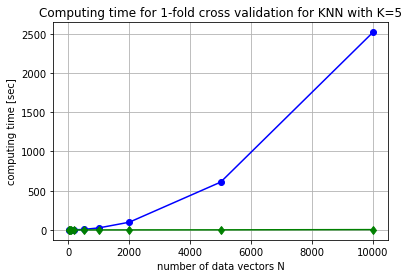

In [17]:
# Programmgeruest zu Versuch 1, Aufgabe 3e
import numpy as np
import matplotlib.pyplot as plt
from time import clock
from V1A2_Classifier import *

# (i) define parameters K,S,N and 2-dimensional Gaussian
C=2
k=5
S=1
N_list=[10,20,50,100,200,500,1000,2000,5000,10000]                      #Insert list of data set size N as desired
mu1, mu2 = [1,1], [3,1]               # expectations for the two classes
cov1 = [[1,0.5],\
        [0.5,1]]                      # covariance matrix for class 1
cov2 = [[1,0.5],\
        [0.5,1]]                      # covariance matrix for class 2
time_comp_naive  = np.zeros(len(N_list));    # allocate memory for time measurements for naive KNN
time_comp_kdtree = np.zeros(len(N_list));    # allocate memory for time measurements for KNN with KD tree

# (ii) Make (wall-)time measurements for cross validations of data sets of various sizes N
for i in range(len(N_list)):
    N=N_list[i]
    print ("\nrunning KNN cross validation for K=",K,"S=",S,"N=",N)

    # (ii.a) generate synthetic data 
    N1,N2=int(N/2),int(N/2)                     # N1 and N2 data vectors for the two classes  
    X1 = np.random.multivariate_normal(mu1,cov1,(N1))    # Gaussian data vectors for class 1
    X2 = np.random.multivariate_normal(mu2,cov2,(N2))    # Gaussian data vectors for class 2
    T1,T2 = N1*[0],N2*[1]             # corresponding class labels 
    X = np.concatenate((X1,X2))       # entire data set
    T = np.concatenate((T1,T2))       # entire label set

    # (ii.b) do cross validation for this data set using naive KNN
    print ("\nNaive KNN Classifier based on KD-Trees:","\n---------------------------------------")
    knnc = KNNClassifier(C,K)         # create classifier object of class KNNClassifier
    t1=clock()                        # start time
    pE,pCE = knnc.crossvalidate(S,X,T)# do S-fold cross validation for data X,T
    t2=clock()                        # end time
    time_comp_naive[i]=t2-t1          # computing time in seconds
    print ("\nS=",S," fold cross validation using the naive KNNClassifier yields the following results:")
    print ("Classification error probability = ", pE)
    print ("Accuracy = ", 1.0-pE)
    print ("Confusion Error Probabilities p(class i|class j) = \n", pCE)
    print ("Computing time = ", time_comp_naive[i], " sec") 

    # (ii.c) do cross validation for this data set using KNN with KD trees
    print ("\nFast KNN Classifier based on KD-Trees:","\n---------------------------------------")
    fknnc = FastKNNClassifier(C,k)
    ft1=clock()
    pE_kdtree,pCE_kdtree=fknnc.crossvalidate(S,X,T)  
    ft2=clock()                        # end time
    time_comp_kdtree[i]=ft2-ft1 

    print ("\nS=",S," fold cross validation using the KD-Tree-KNNClassifier yields the following results:")
    print ("Classification error probability = ", pE)
    print ("Accuracy = ", 1.0-pE)
    print ("Confusion Error Probabilities p(class i|class j) = \n", pCE)
    print ("Computing time = ", time_comp_kdtree[i], " sec") 

# (iii) print results
print ("\nResults for N=",N_list,"\ntime_comp_naive=",time_comp_naive,"\ntime_comp_kdtree=",time_comp_kdtree)

# (iv) plot results
f=plt.figure()
a = f.add_subplot(111)
a.plot(N_list,time_comp_naive,'bo-',N_list,time_comp_kdtree,'gd-')       # plot computing times 
a.set_xlabel('number of data vectors N');
a.set_ylabel('computing time [sec]');
a.set_title('Computing time for '+str(S)+'-fold cross validation for KNN with K='+str(K));
a.grid()

plt.show()


